## Q6

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn import linear_model
from dateutil.parser import parse

In [125]:
data = pd.read_csv('demo.csv')
bucket = 1
hrCount = data[['start_time']]
hrCount = np.array(hrCount).flatten()
#print len(hrCount)
hr1 = parse(min(hrCount))
#print hr1
hr2 = parse(hrCount[len(hrCount)-1])
print hr2
time = hr2-hr1
print min(hrCount)
print time
hour = ((time.days*24) + (time.seconds)//3600) / bucket
array = [0 for i in range(1000)]

2013-08-17 16:49:04
2013-08-01 00:01:26
16 days, 16:47:38


In [126]:
hour = parse(hrCount[0])
for t in hrCount:
    t = parse(t)
    #print t
    time = t - hour
    diff = ((time.days*24) + (time.seconds)//3600) / bucket
    array[diff] += 1
    
#print array
    

In [129]:
result = []
#print data
#data = data.values
predictTrue= 200
for i in range(150):
    result.append(array[predictTrue+i-((24*7)/bucket)])
Y=[]
for i in range(200,350):
    Y.append(array[i])
print len(Y)
print len(result)

150
150



average error:   22.34


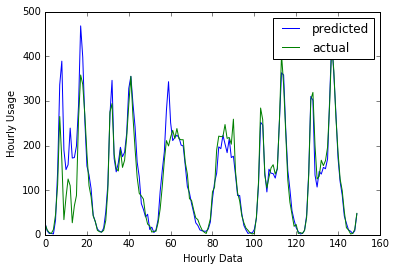

In [130]:
plt.plot(result, label="predicted")
#T = data[577:]
print
plt.plot(Y, label = "actual")
sum = 0.0
for i in range(len(result)):
    sum += abs(result[i]-Y[i])
print "average error:  ",str(sum/len(result))
plt.xlabel('Hourly Data')
plt.ylabel('Hourly Usage')
#print plt
plt.legend()
plt.show()

In [7]:
def ewma_my2(data, alpha, start):
    result = []
    #pt1 = alpha*(data.loc[start-1] + (1-alpha)*data.loc[start-2] + ((1-alpha)**2)*data.loc[start-3] + ((1-alpha)**3)*data.loc[start-4] + ((1-alpha)**4)*data.loc[start-5] + ((1-alpha)**5)*data.loc[start-6]+ ((1-alpha)**6)*data.loc[start-7] + ((1-alpha)**7)*data.loc[start-8] + ((1-alpha)**8)*data.loc[start-9]   ) 
    pt1 = 0
    for i in range(576):
        pt1 = pt1 + ((1-alpha)**i)*data.loc[start-(i+1)]
    pt1 = pt1*alpha
    #print float(pt1)
    result.append(pt1)
    for i in range(143):
        pt1 = alpha * data.loc[start+i]+ (1-alpha)*result[i]
        result.append(pt1)
    return result


def ewma_my(data, alpha, start):
    result = []
    data = data.values
    pt576 = alpha*(data[575]) + (1-alpha)*(data[575])
    #print "valie", float(pt576),  float(data.loc[575])
    result.append(pt576)
    #print "res: ",result
    for i in range(143):
        pt1 = ((alpha) * (data[start+i]))+ ((1-alpha)*result[i])
        #print pt1, data[start+i], result[i]
        result.append(pt1)
    #print result
    return result
    

Average error:  [6.84891854]


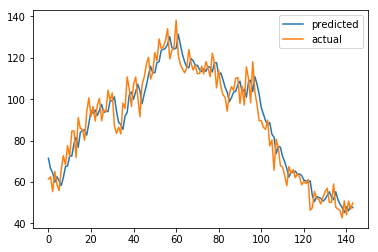

In [8]:
result =  ewma_my(data, 0.5, 576)
#print len(result,)
plt.plot(result, label = "predicted")
plt.plot(data[576:].values, label = "actual")
actual = data[576:].values
sum = 0
for i in range(len(result)):
    sum+=abs((result[i]-actual[i])/actual[i])
print "Average error: ",str(100*sum/144)
plt.legend()
plt.show()

### b

Average error:  [6.96807131]


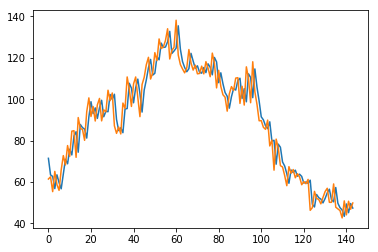

In [9]:
result =  ewma_my(data, 0.8, 576)
#print len(result,)
plt.plot(result, label = "predicted")
plt.plot(data[576:].values, label = "test")

sum = 0
for i in range(len(result)):
    sum+=abs((result[i]-actual[i])/actual[i])
print "Average error: ",str(100*sum/144)

plt.show()

## C - seasonal

In [10]:
result = []
#print data
data = data.values
for i in range(144):
    result.append(data[i+432][0])
Y = []
for i in range(144):
    Y.append(data[i+576][0])


average error:   16.078203501786774


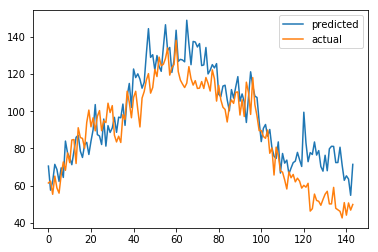

In [11]:
plt.plot(result, label="predicted")
T = data[577:]
print 
plt.plot(Y, label = "actual")
sum = 0
for i in range(len(result)):
    sum += 100*abs(result[i]-Y[i])/Y[i]
print "average error:  ",str(sum/len(result))
#print sum(abs(re]sult -Y))/len(result)
#print plt
plt.legend()
plt.show()

In [12]:
def AR(alpha, data, testLen):
    array = []
    predict = []
    for i in range(alpha, len(data)):
        #print data[i-alpha:i]
        array.append(data[i-alpha:i])
        predict.append(data[i])
    result = []
    #trainX = array[:len(array)-testLen][:]
    trainY = predict[:len(array)-testLen]
    #print trainY
    for i in range(testLen):
        regr = linear_model.LinearRegression()
        #print len(array)-testLen+i
        trainX = array[:len(array)-testLen+i][:]
        testX = array[len(array)-testLen+i][:]
        trainY = predict[:len(array)-testLen+i]
        testY = predict[len(array)-testLen+i]
        regr.fit(trainX, trainY)
        arr = []
        arr.append(testX)
        pred =  regr.predict(arr)
        #print pred
        result.append(pred)
    return result

# 6 D Arr(144) (estimates for each new input)

Average error:  [7.53267834]


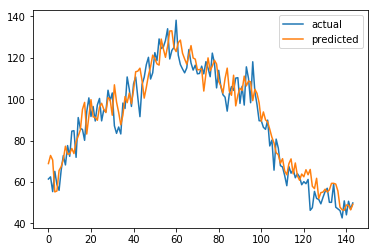

In [13]:
data = pd.read_csv('A5_q6.csv')
data= data.values
data = np.array(data).flatten()
pred = AR(144, data, 144)
actual = data[576:]
sum = 0
for i in range(len(pred)):
    sum+=100 * abs(pred[i]-actual[i])/actual[i]
print "Average error: ",str(sum/len(pred))
plt.plot(actual, label = "actual")
plt.plot(pred,label="predicted")
plt.legend()
plt.show()

# 6 E Arr(6) (estimates for each new input)

Average error:  [6.98347582]


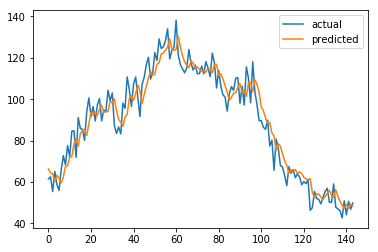

In [14]:
data = pd.read_csv('A5_q6.csv')
data= data.values
data = np.array(data).flatten()
pred = AR(6, data, 144)
actual = data[576:]
sum = 0
for i in range(len(pred)):
    sum+=100*abs(pred[i]-actual[i])/actual[i]
print "Average error: ",str(sum/len(pred))
plt.plot(actual, label = "actual")
plt.plot(pred,label="predicted")
plt.legend()
plt.show()

### 6 F

##### 1. In case of seasonal, the error is most and the predicted graph has a very different pattern than the actual
##### 2. The predictions of EWMA is more accurate than predictions of AR